In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
import cv2

In [94]:
l = os.listdir("./im")

In [4]:
l

['IMG_20200319_182736987.jpg', 'IMG_20200319_201925161.jpg']

In [5]:
k = np.array(Image.open(f'./im/{l[1]}'))

In [6]:
k.shape

(4608, 3456, 3)

In [7]:
img = cv2.imread(f'./im/{l[1]}',2)

In [8]:
img.shape

(4608, 3456)

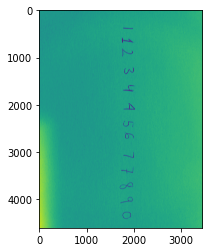

In [9]:
plt.imshow(img)

In [10]:
ret, bw_img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

In [11]:
ret

127.0

In [12]:
bw_img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [70]:
l = os.listdir("./im")

In [71]:
img = cv2.imread(f'./im/{l[1]}',2)

In [72]:
if img.shape[0] > img.shape[1]:
    img = np.rot90(img)

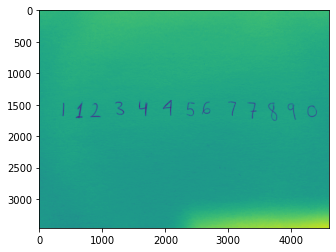

In [73]:
plt.imshow(img)

In [74]:
n = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]

In [75]:
thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)[1]

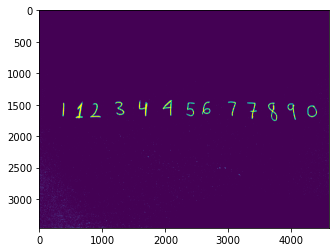

In [76]:
plt.imshow(thresh)

In [77]:
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [78]:
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
pi = []
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    if w + h > 100:
        print(x, y, w, h)
        pi.append(n[y:y+h, x:x+w])

4264 1512 154 187
3949 1481 134 258
813 1478 172 223
372 1472 32 212
3640 1469 146 290
2344 1467 129 215
3307 1466 151 259
582 1466 114 251
1210 1454 146 211
2591 1453 133 200
3002 1451 128 228
1586 1451 138 233
1966 1429 150 249


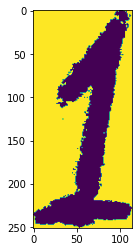

In [79]:
plt.imshow(pi[7])

In [80]:
p = pi.copy()
for i in range(len(p)):
    if p[i].shape[0] > p[i].shape[1]:
        zero = np.full((p[i].shape[0], int((p[i].shape[0] - p[i].shape[1])/2)), 255)
        p[i] = np.concatenate((zero, p[i]), axis=1)
        p[i] = np.concatenate((p[i], zero), axis=1)
    else:
        zero = np.full((int((p[i].shape[1] - p[i].shape[0])/2), p[i].shape[1]), 255)
        p[i] = np.concatenate((zero, p[i]), axis=0)
        p[i] = np.concatenate((p[i], zero), axis=0)

In [81]:
p[-1].shape

(249, 248)

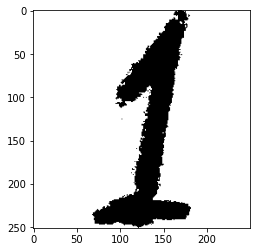

In [82]:
plt.imshow(p[7], cmap='gray')

In [83]:
res = []
for ps in p:
    res.append(cv2.resize(ps, dsize=(45, 45), interpolation= cv2. INTER_NEAREST))

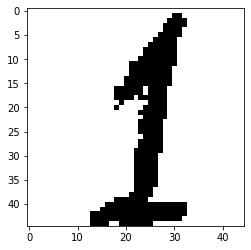

In [84]:
plt.imshow(res[7], cmap='gray')

In [56]:
img = []
y = []
for j in range(10):
    l = os.listdir(f'./{j}')
    for i in l[:-200]:
        img.append(np.array(Image.open(f'./{j}/{i}')))
        y.append(j)
x_test = []
y_test = []
for j in range(10):
    l = os.listdir(f'./{j}')
    for i in l[-200:]:
        x_test.append(np.array(Image.open(f'./{j}/{i}')))
        y_test.append(j)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = np.array(img)
y = np.array(y)
BATCH_SIZE = 128
NUM_CLASSES = 10
EPOCHS = 100

IMG_ROWS, IMG_COLS = 45, 45
import keras.backend as K

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, IMG_ROWS, IMG_COLS)
    x_test = x_test.reshape(x_test.shape[0], 1, IMG_ROWS, IMG_COLS)
    INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)
else:
    x_train = x_train.reshape(x_train.shape[0], IMG_ROWS, IMG_COLS, 1)
    x_test = x_test.reshape(x_test.shape[0], IMG_ROWS, IMG_COLS, 1)
    INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
from keras.utils import to_categorical

# convert class vectors to binary class matrices
y = to_categorical(y, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
from keras.models import Model 
from keras.layers import Input, Dense 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.layers import Flatten 
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D 
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta
model = Sequential() 
model.add(Conv2D(32, (3, 3), input_shape =INPUT_SHAPE, activation ='relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
model.add(Conv2D(32, (3, 3), activation ='relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
model.add(Conv2D(64, (3, 3), activation ='relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
model.add(Dropout(0.2))
model.add(Flatten()) 
model.add(Dense(128, activation ='relu')) 
model.add(Dense(50, activation ='relu')) 
model.add(Dense(NUM_CLASSES, activation ='softmax'))
model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])
model.fit(x_train, y,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 28313 samples, validate on 2000 samples
Epoch 1/100
28313/28313 [==============================] - 18s 649us/step - loss: 0.7145 - accuracy: 0.7660 - val_loss: 0.3346 - val_accuracy: 0.8860
Epoch 2/100
28313/28313 [==============================] - 19s 682us/step - loss: 0.1897 - accuracy: 0.9424 - val_loss: 0.2831 - val_accuracy: 0.9145
Epoch 3/100
28313/28313 [==============================] - 18s 626us/step - loss: 0.1270 - accuracy: 0.9632 - val_loss: 0.1500 - val_accuracy: 0.9535
Epoch 4/100
28313/28313 [==============================] - 18s 628us/step - loss: 0.1019 - accuracy: 0.9691 - val_loss: 0.1165 - val_accuracy: 0.9665
Epoch 5/100
28313/28313 [==============================] - 17s 618us/step - loss: 0.0861 - accuracy: 0.9745 - val_loss: 0.1185 - val_accuracy: 0.9645
Epoch 6/100
28313/28313 [==============================] - 18s 627us/step - loss: 0.0734 - accuracy: 0.9778 - val_loss: 0.1469 - val_accuracy: 0.9530
Epoch 7/100
28313/28313 [==========================

Epoch 55/100
28313/28313 [==============================] - 18s 623us/step - loss: 0.0045 - accuracy: 0.9983 - val_loss: 0.1152 - val_accuracy: 0.9835
Epoch 56/100
28313/28313 [==============================] - 17s 613us/step - loss: 0.0053 - accuracy: 0.9983 - val_loss: 0.0972 - val_accuracy: 0.9830
Epoch 57/100
28313/28313 [==============================] - 17s 614us/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.1025 - val_accuracy: 0.9820
Epoch 58/100
28313/28313 [==============================] - 18s 625us/step - loss: 0.0046 - accuracy: 0.9981 - val_loss: 0.1088 - val_accuracy: 0.9835
Epoch 59/100
28313/28313 [==============================] - 18s 636us/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.1160 - val_accuracy: 0.9840
Epoch 60/100
28313/28313 [==============================] - 18s 653us/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0926 - val_accuracy: 0.9870
Epoch 61/100
28313/28313 [==============================] - 18s 639us/step - loss: 0.0039 - ac

In [58]:
import pandas as pd

In [60]:
dist = []
for j in range(10):
    l = os.listdir(f'./{j}')
    for i in l[:-200]:
        dist.append(j)

In [61]:
dist = pd.Series(dist)

In [62]:
dist.value_counts()

1    8449
2    8373
3    3309
4    2138
0    2025
5     943
9     797
6     791
8     765
7     723
dtype: int64

In [55]:
len(x_test)

2000

In [85]:
for i in range(len(res)):
    res[i] = res[i]/255

In [86]:
res = np.array(res)

In [87]:
len(res)

13

In [88]:
x_test.shape

(2000, 45, 45, 1)

In [89]:
res = res.reshape(len(res), 45, 45, 1)

In [90]:
model.predict_classes(res)

array([0, 9, 2, 1, 8, 5, 7, 4, 3, 6, 7, 4, 4])

In [92]:
pi[0].shape

(187, 154)

In [37]:
res2 = []
for ps in pi:
    res2.append(cv2.resize(ps, dsize=(45, 45), interpolation= cv2. INTER_NEAREST))

In [38]:
for i in range(len(res2)):
    res2[i] = res2[i]/255
res2 = np.array(res2)
res2 = res2.reshape(len(res2), 45, 45, 1)    

In [39]:
model.predict_classes(res2)

array([0, 9, 2, 8, 8, 5, 7, 4, 3, 6, 7, 4, 4])

In [328]:
from sklearn.cluster import DBSCAN
import pandas as pd
from hdbscan import HDBSCAN

In [93]:
model.save("100epochs.h5")

In [365]:
arr = pi[7]

In [366]:
x = []
y = []
for i in range(len(arr)):
    for j in range(len(arr[i])):
        if arr[len(arr) - i - 1, j] == 0:
            x.append(j)
            y.append(i)

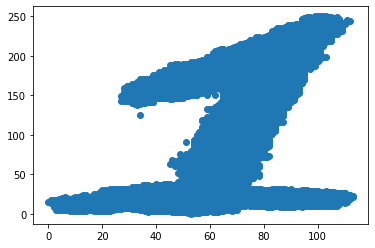

In [367]:
plt.scatter(x, y)

In [368]:
di = {'X':x, 'Y':y}

In [369]:
df = pd.DataFrame(di)

In [370]:
df

,X,Y
0,53,0
1,52,1
2,53,1
3,54,1
4,55,1
...,...,...
9973,99,250
9974,100,250
9975,101,250
9976,102,250


In [377]:
db = HDBSCAN(min_samples=5)

In [378]:
h = db.fit_predict(df)

In [379]:
np.unique(h)

array([-1,  0,  1])

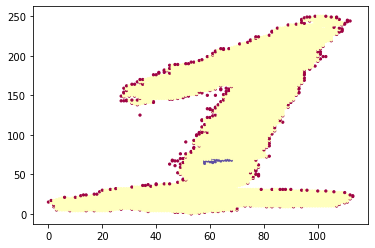

In [380]:
plt.scatter(x, y, c=h, cmap='Spectral', s=5)

In [375]:
hi = pd.Series(h).value_counts()

In [376]:
hi

 0    8975
-1     998
 1       5
dtype: int64

In [41]:
from keras.models import load_model

In [42]:
m = load_model("first_try.h5")

In [44]:
m.predict_classes(res)

array([0, 9, 2, 1, 8, 5, 7, 4, 3, 6, 7, 4, 4])